### MNIST digits dataset classification using Binary Logistic Regression
From digits dataset we need to take two features: "6" and "8" for train and test models.

## Preparation Steps

In [1]:
# Import needed libraries
import pandas
import numpy
import matplotlib.pyplot as plot
import seaborn

# plot stuff inline
%matplotlib inline

In [2]:
# Load digits dataset
from sklearn import datasets
digits_dataset = datasets.load_digits()

# Visualize dataset keys
print("Dataset contents:")
print(digits_dataset.keys())

Dataset contents:
dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [3]:
print (digits_dataset.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

## Exploratory Data Analysis

In [4]:
print (f"Data shape: {digits_dataset.data.shape}");
print (f"Data target shape: {digits_dataset.target.shape}");
print ("\n")
print("First image representation:\n",digits_dataset.images[0])
print("First image shape:\n",digits_dataset.images[0].shape)

Data shape: (1797, 64)
Data target shape: (1797,)


First image representation:
 [[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
First image shape:
 (8, 8)


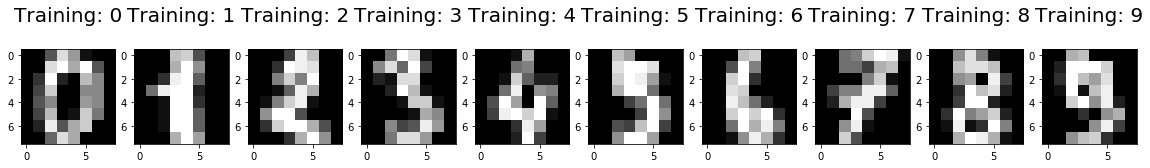

In [5]:
# Preview first 10 elements
max_index = 10

plot.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits_dataset.data[:max_index], digits_dataset.target[:max_index])):
 plot.subplot(1, max_index, index + 1)
 plot.imshow(numpy.reshape(image, (8,8)), cmap=plot.cm.gray)
 plot.title('Training: %i\n' % label, fontsize = 20)

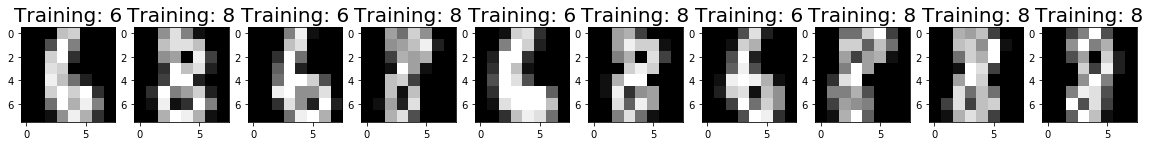

In [6]:
# Filter dataset to contain only "1" and "5" samples
# Create filter
np_filter = numpy.where((digits_dataset.target == 6 ) | (digits_dataset.target == 8))

# Filter data
filtered_data = digits_dataset.data[np_filter]
filtered_target = digits_dataset.target[np_filter]

# Preview first 10 elements if we have correctly filtered dataset
plot.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(filtered_data[0:max_index], filtered_target[0:max_index])):
    plot.subplot(1, max_index, index + 1)
    plot.imshow(numpy.reshape(image, (8,8)), cmap = plot.cm.gray)
    plot.title(f"Training: {label}", fontsize = 20)

In [7]:
# Split filtered data into train and test sets:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(filtered_data, filtered_target, test_size = 0.2, random_state=42)

## Train Model using Logistic Regression

In [8]:
# Load model
from sklearn.linear_model import LogisticRegression
model_LogisticRegression = LogisticRegression(solver="lbfgs")

In [9]:
# Train model on prepared dataset
model_LogisticRegression.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

Predicted value =  [6]


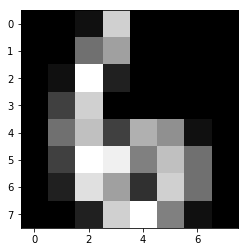

In [10]:
# Test on Single prediction

random_index = 3

single_prediction = model_LogisticRegression.predict(X_test[random_index].reshape(1,-1))
print("Predicted value = ", single_prediction)
plot.imshow(numpy.reshape(X_test[random_index],(8,8)), cmap = plot.cm.gray)

In [11]:
# Make predictions on entire test data
predictions = model_LogisticRegression.predict(X_test)

In [12]:
# Use score method to get accuracy of model
score = model_LogisticRegression.score(X_test, y_test)
print(f"Score = {score}")

Score = 1.0


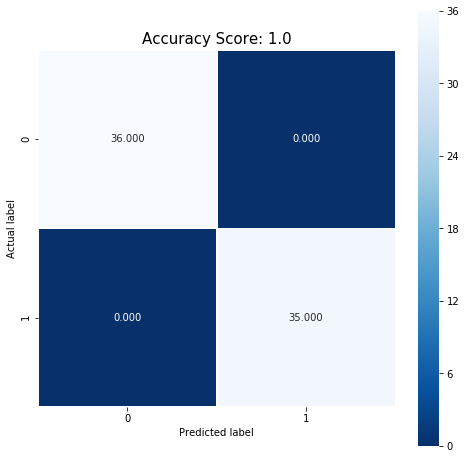

In [13]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
plot.figure(figsize=(8,8))
seaborn.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plot.ylabel('Actual label');
plot.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plot.title(all_sample_title, size = 15);
plot.show();